In [ ]:
## Setting up LLM
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from pydantic import BaseModel
from typing import Literal
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from pprint import PrettyPrinter
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage


In [64]:
# Instantating LLM with Groq
llm=ChatGroq(model="qwen/qwen3-32b")


In [ ]:
# Creating the Pydantic class

class calcState(BaseModel):
    operation: Literal["add", "subtract", "multiply", "divide"]
    oper1: int
    oper2: int
    result: int = None
    messages: Annotated[list[AnyMessage],add_messages]

In [ ]:
### Creating LLM Node
def llm_calculator(state: calcState) -> calcState:
    prompt =f"what is {state.oper1} {state.operation} {state.oper2}"
    response =llm.invoke([HumanMessage(content=prompt)])
    try:
        state.result = int(response.content.strip().split()[0])
    except:
        state.result=None
    return state


In [67]:
### Creating the Graph
graph = StateGraph(calcState)
graph.add_node("calculator",llm_calculator)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

graph_build = graph.compile()


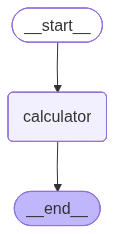

In [68]:
display(Image(graph_build.get_graph().draw_mermaid_png()))